# Contexto e Problematização: 

O escopo do seguinte projeto é coleta dos twittes com a ***#df1.***

Essa hashtag é utilizada para caputarar mensagens dos usuários que acompanham o telejornal DFTV repodruzido pela TVGLOBO no Distrito Federal interagem durante o programa.

O objetivo final  é saber ***qual o termo que os usuários mais comentam e com eles mais se relacionam. ***

Para ter uma amostra representativa será coletado ***1000 twittes. ***






In [1]:
import nltk
import pandas as pd
import numpy as np
from nltk.stem import WordNetLemmatizer
import re
import operator
from nltk.tokenize import sent_tokenize
from nltk.tokenize import word_tokenize
from nltk.corpus import words
from nltk.corpus import webtext
import tweepy
import re 
import pickle
import pandas as pd
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


True

In [0]:
#bibliocate para autenticar
from tweepy import OAuthHandler

In [0]:
#chavas de acesso
consumer_key = '5vP05hQu0Fjl4F5ObJES5PgFp'
consumer_secret = 'vt8Ds3FDZ4Qi7KvEOXDPLyZPrcYboGyPTXeZISVgOFeBV00XFU'
access_token = '55943119-cXi7Xl0DDmoxwVcMyrf80v7woheh9YxnNwmAh8YSM'
access_secrete = 'fOUYMQcyNAO3X2siI4aWCwE8Q9p2ZLdxDh04xmaNgsC8l'

In [0]:
#método de autenticas
auth = OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secrete)

In [0]:
#termo de busca
args = ['#df1']
api  = tweepy.API(auth, timeout=10)

In [0]:
#criacao de lista de twittes

list_tweets = []
query = args[0]


In [0]:
#buscar todos twiites
if len(args) ==1:
  for status in tweepy.Cursor(api.search, q=query+" -filter:retweets", lang='pt', result_type='recent').items(1000):
    list_tweets.append(status.text)

In [0]:
#imprimir 
#list_tweets

In [10]:
# conveter lista para texto
nltk.download('punkt')
texto = str(list_tweets)
type(texto)
moby_tokens = nltk.word_tokenize(texto)
text1 = nltk.Text(moby_tokens)
text1

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


<Text: [ ' # df1 Sabadão com DF1 ,...>

In [11]:
#total de termos no documento
from nltk.stem import WordNetLemmatizer

def total_termos():

    lemmatizer = WordNetLemmatizer()
    lemmatized = [lemmatizer.lemmatize(w,'v') for w in text1]

    return len(set(lemmatized))

total_termos()

2128

In [12]:
#frequencia de caracteres
def maiores_caracteres():
    dist = nltk.FreqDist(text1)
    sorted_x = sorted(dist.items(),key=operator.itemgetter(1))
    sorted_x.reverse()
    
    return sorted_x[:100]

maiores_caracteres()

[(',', 514),
 ("'", 496),
 ('#', 296),
 ('df1', 157),
 ('.', 151),
 ('de', 145),
 ('a', 145),
 ('que', 142),
 ('!', 141),
 (':', 137),
 ('https', 130),
 ('o', 127),
 ('e', 113),
 ('DF1', 96),
 ('é', 80),
 ('não', 70),
 ('do', 65),
 ('?', 61),
 ('em', 57),
 ('com', 54),
 ('no', 52),
 ('Fábio', 48),
 ('se', 48),
 ('da', 47),
 ('tarde', 41),
 ('para', 39),
 ('saúde', 37),
 ('uma', 32),
 ('na', 31),
 ('os', 31),
 ('tem', 30),
 ('DF', 27),
 ('está', 27),
 ('um', 27),
 ('as', 27),
 ('pra', 26),
 ('...', 26),
 ('boa', 24),
 ('O', 24),
 ('esse', 23),
 ('já', 20),
 ('população', 19),
 ('Df1', 19),
 ('\\n', 18),
 ('mais', 18),
 ('governo', 18),
 ('muito', 18),
 ('ser', 17),
 ('A', 17),
 ('são', 17),
 ('ele', 17),
 ('por', 16),
 ('dengue', 16),
 ('como', 16),
 ('vai', 16),
 ('só', 15),
 ('governador', 15),
 ('quando', 15),
 ('Boa', 14),
 ('É', 13),
 ('dos', 13),
 ('essa', 12),
 ("'A", 12),
 ('@', 12),
 ('ter', 12),
 ('criança', 11),
 ('crianças', 11),
 ('isso', 11),
 ('ao', 11),
 ('sempre', 11),


# Termos Frequentes: 
Podemos observar que o termos: ***dengue*** e ***governador*** tem grande relevância nos textos coletados


In [13]:
#termos frequentes com mais de 5 caracteres top 10
def termos_frequentes():
    dist = nltk.FreqDist(text1)
    vocab1 = dist.keys()
    freqwords = [w for w in vocab1 if len(w) > 5 and dist[w] > 10]
    return sorted(freqwords)

termos_frequentes()

['criança',
 'crianças',
 'dengue',
 'governador',
 'governo',
 'população',
 'quando',
 'sempre']

In [0]:
dist = nltk.FreqDist(text1)
vocab1 = dist.keys()
freqwords = [w for w in vocab1 if len(w) > 3 and dist[w] > 2]
total = str(freqwords)


# Nuvem de Palavras

Na nuvem de palavras podemos observar os termos:  ***dengue, governador e hospitais*** como mais frequentes. 

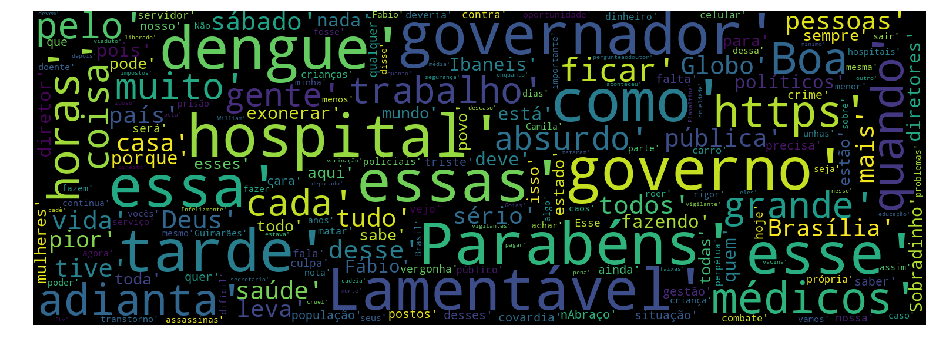

In [15]:
#wordcloud
from wordcloud import WordCloud
import matplotlib.pyplot as plt

wordcloud = WordCloud(max_font_size=100,width = 1520, height = 535).generate(total)
plt.figure(figsize=(16,9))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

In [16]:
#converter em data frame
dfObj = pd.DataFrame(list_tweets, columns = ['text']) 
dfObj.shape

(313, 1)

In [18]:
#funcao para retirar stopwords
nltk.download('stopwords')
STOP_WORDS = nltk.corpus.stopwords.words("portuguese")

def clean_sentence(val):
    
    regex = re.compile('([^\s\w]|_)+')
    sentence = regex.sub('', val).lower()
    sentence = sentence.split(" ")
    
    for word in list(sentence):
        if word in STOP_WORDS:
            sentence.remove(word)  
            
    sentence = " ".join(sentence)
    return sentence
  
def clean_dataframe(train_df): 
    for col in ['text']:
        train_df[col] = train_df[col].apply(clean_sentence)
        
    return train_df

data = clean_dataframe(dfObj)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [0]:
def build_corpus(data):
    "Creates a list of lists containing words from each sentence"
    corpus = []
    for col in ['text']:
      for sentence in data[col].iteritems():
          word_list = sentence[1].split(" ")
          corpus.append(word_list)
            
      return corpus

corpus = build_corpus(data)        


In [21]:
#cria modelo
from gensim.models import word2vec

model = word2vec.Word2Vec(corpus, size=20, window=20, min_count=5, workers=4)
model.wv['dengue']

array([-0.01231041, -0.02172284,  0.02111545,  0.02534086,  0.01818128,
        0.00131826, -0.00097069,  0.010868  , -0.00069124,  0.01297778,
        0.00811206, -0.00666652,  0.00011684, -0.01213081, -0.01336009,
       -0.00656631, -0.00874865,  0.02557399, -0.01988476,  0.01230534],
      dtype=float32)

# Similaridade 

O termo ***dengue*** tem similaridade com os seguintes termos: 

In [22]:
#verificar similaridade
similar = model.wv.most_similar('dengue')
similar

/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


[('', 0.5524762868881226),
 ('tudo', 0.5387194752693176),
 ('df1', 0.5313288569450378),
 ('pois', 0.5290426015853882),
 ('gdf', 0.4788364768028259),
 ('vigilantes', 0.448061466217041),
 ('governador', 0.440546452999115),
 ('gente', 0.42957785725593567),
 ('caso', 0.42099395394325256),
 ('saúde', 0.3978296220302582)]

In [25]:
#cria modelo
from gensim.models import word2vec

model = word2vec.Word2Vec(corpus, size=20, window=20, min_count=5, workers=4)
model.wv['hospitais']

array([ 0.00794852,  0.01044317, -0.01040548, -0.00169257, -0.00598502,
       -0.01554123, -0.00402673, -0.0157724 ,  0.01684741,  0.01414109,
        0.01068534,  0.01718999,  0.02408307, -0.01128383,  0.00912845,
        0.01179938,  0.00957225, -0.01207521,  0.01902689, -0.01721025],
      dtype=float32)

# Similaridade 

O termo ***hospitais*** tem similaridade com os seguintes termos: 

In [26]:
#verificar similaridade
similar = model.wv.most_similar('hospitais')
similar

/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


[('mãe', 0.46386075019836426),
 ('coisa', 0.3830799460411072),
 ('fábio', 0.3682999014854431),
 ('lis', 0.36425483226776123),
 ('deus', 0.3451721966266632),
 ('vergonha', 0.3357335329055786),
 ('dias', 0.3295646011829376),
 ('aqui', 0.29597964882850647),
 ('governo', 0.2893272340297699),
 ('ter', 0.27431073784828186)]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  if __name__ == '__main__':


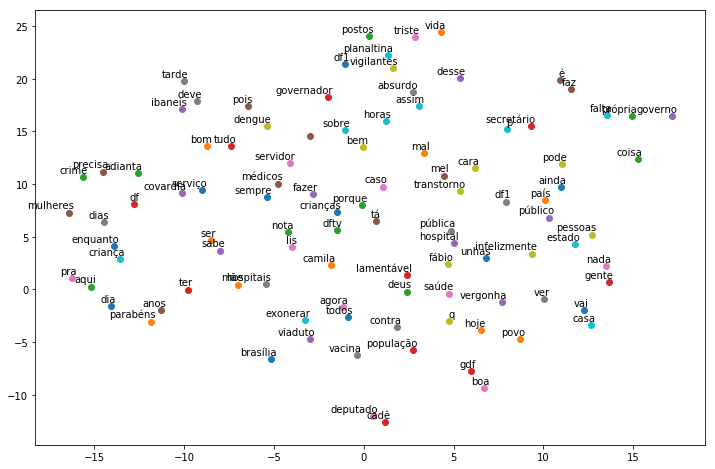

In [28]:
#plot
from sklearn.manifold import TSNE

def tsne_plot(model):
    "Creates and TSNE model and plots it"
    labels = [] 
    tokens = []

    for word in model.wv.vocab:
        tokens.append(model[word])
        labels.append(word)
    tsne_plot_vector(tokens, labels)
    
def tsne_plot_vector(tokens, labels):
    
    tsne_model = TSNE(perplexity=15, n_components=2, init='random', 
                       n_iter=5000, random_state=23,
                       learning_rate=50)
    new_values = tsne_model.fit_transform(tokens) 
    
    x = []
    y = []

    for value in new_values:
        x.append(value[0])
        y.append(value[1])
        
    plt.figure(figsize=(12, 8)) 
    for i in range(len(x)):
        plt.scatter(x[i],y[i])
        plt.annotate(labels[i],
                     xy=(x[i], y[i]),
                     xytext=(5, 2),
                     textcoords='offset points',
                     ha='right',
                     va='bottom')
    plt.show()
    
tsne_plot(model)

# Abordagem 2.

utilizar biblioteca sentlex para realizar analise de sentimento de forma não supervisionada
utilizar matriz tf if para vetorizar

In [29]:
dfObj.shape

(313, 1)

In [30]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
#biblioteca
sentilexpt = open('/content/drive/My Drive/Colab Notebooks/SentiLex-lem-PT01.txt',  'r')

In [0]:
#percorrer array 
dic_palavra_polaridade = {}
for i in sentilexpt.readlines():
    pos_ponto = i.find('.')
    palavra = (i[:pos_ponto])
    pol_pos = i.find('POL')
    polaridade = (i[pol_pos+4:pol_pos+6]).replace(';','')
    dic_palavra_polaridade[palavra] = polaridade

In [0]:
#impressao de função de polaridade
#print (dic_palavra_polaridade)

In [0]:
#função de polaridade 
def Score_sentimento(frase):
    frase = frase.lower()
    l_sentimento = []
    for p in frase.split():
        l_sentimento.append(int(dic_palavra_polaridade.get(p, 0)))
    score = sum(l_sentimento)
    if score > 0:
        return 'Positivo'
    elif score == 0:
        return 'Neutro'
    else:
        return 'Negativo'

In [35]:
Score_sentimento('dengue')

'Neutro'

In [36]:
#retirar campos em branco 

dfObj.dropna(inplace=True)
dfObj.head()

,text
0,df1 sabadão df1 bom d
1,df1 adianta ter tendas reagente buscam hospita...
2,boa tarde fred q horas vai feira livrodf1
3,fabrício capinejar grande artista parabéns tra...
4,df1 gosto fabrício carpinejar cada coisa falae...


In [0]:
#criar coluna com polaridade 
dfObj['sentimento'] = dfObj['text'].apply(Score_sentimento)

In [38]:
dfObj.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 313 entries, 0 to 312
Data columns (total 2 columns):
text          313 non-null object
sentimento    313 non-null object
dtypes: object(2)
memory usage: 7.3+ KB


In [39]:
dfObj.head()

,text,sentimento
0,df1 sabadão df1 bom d,Positivo
1,df1 adianta ter tendas reagente buscam hospita...,Neutro
2,boa tarde fred q horas vai feira livrodf1,Neutro
3,fabrício capinejar grande artista parabéns tra...,Positivo
4,df1 gosto fabrício carpinejar cada coisa falae...,Neutro


In [40]:
#valores
dfObj['sentimento'].value_counts()

Neutro      163
Negativo    100
Positivo     50
Name: sentimento, dtype: int64

In [0]:
#ajsutar dataframe
dfObj = [e for e in dfObj['text'] if isinstance(e, str)]
dfObj = pd.DataFrame(dfObj)

In [0]:
#importa biblitotecas
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import normalize
from sklearn.cluster import KMeans
from sklearn.metrics.pairwise import cosine_similarity
vectorizer = TfidfVectorizer() # variar parametros (L1/L2, etc)
X = vectorizer.fit_transform(dfObj[0])
X = normalize(X)

In [0]:
kmeans = KMeans(
    n_clusters = 5, # variar
    n_init = 15, 
    max_iter = 450, 
    init = 'k-means++'
)

In [44]:
#treinar com kmeans

kmeans.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=450,
       n_clusters=5, n_init=15, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [45]:
dfObj['cluster'] = kmeans.labels_
dfObj

,0,cluster
0,df1 sabadão df1 bom d,3
1,df1 adianta ter tendas reagente buscam hospita...,1
2,boa tarde fred q horas vai feira livrodf1,2
3,fabrício capinejar grande artista parabéns tra...,1
4,df1 gosto fabrício carpinejar cada coisa falae...,1
5,governo universidades pagarem água luz funcina...,3
6,df1 é absurdo pessoas capacidade estragar q é ...,3
7,df1 celebração vida alma pentecostes é vida de...,1
8,quais festas juninas boas desse sábado df1,1
9,df1 sabendo podemos contar saúde pública dengu...,4


In [46]:
dfObj['cluster'].value_counts()

1    175
2     49
4     36
0     28
3     25
Name: cluster, dtype: int64

In [47]:
#cluster dengue
dfObj[dfObj['cluster']==1]

,0,cluster
1,df1 adianta ter tendas reagente buscam hospita...,1
3,fabrício capinejar grande artista parabéns tra...,1
4,df1 gosto fabrício carpinejar cada coisa falae...,1
7,df1 celebração vida alma pentecostes é vida de...,1
8,quais festas juninas boas desse sábado df1,1
11,df1 fw neste país constituição determina leva ...,1
12,parada ônibus cheia livros q pracatv ama\ndf1 ...,1
13,df1 porque tweets passam sacanagem,1
14,df1 governador ibaneis fazendo é ridículo pois...,1
15,df1 problema é justamente deve administrar hos...,1


In [48]:
#cluster dengue
dfObj[dfObj['cluster']==2]

,0,cluster
2,boa tarde fred q horas vai feira livrodf1,2
16,df1 peraí fábio sexto diretor exonerado melhor...,2
20,boa tarde fábio causo saúde df virou piada en...,2
21,df1 boa tarde fábio referente medium avisa aí ...,2
26,df1 fábio willian governador acha engana todo ...,2
29,fábio indignação reflete sentimento povo df ob...,2
38,df1 boa tarde fábio governador so fica promess...,2
39,df1 boa tarde fábio responsáveis conselho tute...,2
62,df1 boa tarde fábio demitem diretores hospitai...,2
71,boa tarde fábio willlian neymar bom jogador ag...,2


In [49]:
#cluster dengue
dfObj[dfObj['cluster']==3]

,0,cluster
0,df1 sabadão df1 bom d,3
5,governo universidades pagarem água luz funcina...,3
6,df1 é absurdo pessoas capacidade estragar q é ...,3
18,df1 boa tarde \n é sempre bom estarmos ligados...,3
28,todo dia tv anhanguera etc\ndf1 httpstcoecqmqp...,3
49,df1 chegará dia todos carros sairão fábrica ba...,3
54,df1 bom dia porta nova entendir agora pq deixa...,3
99,bom remédio pra parar roer unhas é passar pime...,3
109,65 tira terno põe havaiana vem hrsm dia nota v...,3
137,df1 aconteceu é choveu ano passado associandos...,3
